In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/Segmentation_HGPFlow/HGPflow')

import numpy as np
import numpy as np
import matplotlib.pyplot as plt

#import hgpflow_v2.performance # don't know why this is needed, but it is
from performance.performance import Performance
from copy import deepcopy

In [5]:
# COCOA- Pythia
truth_path = "/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/Cocoa_Zjets/500GeVPythiaZq/cocoa_Zjets_500GeV_Pythia_job124_Pseed124_Cseed124_1000events_skim.root"
pred_path = "/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/HGPFLOW_v2/experiments/hgpflow_v2/cocoapythia500gevxs2xxx9a56ipcxj/inference/500GeVPythiaZq/pred_cocoa_Pythia_Zq_chunk_124_seg_merged.root"

#Cocoa - Herwig
#truth_path = ""
#pred_path = ""


filepath_reference = ""
save_dir = '/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/HGPFLOW_v2/hgpflow_v2/tests/'
jet_radius = 0.4
detector = 'COCOA'

hung_matching = False
jet_clustering = True
compute_substructure = False
ind_threshold = 0.50

#n_events = 41380
n_events = -1
enum_offset = 0



In [6]:
perf = Performance(truth_path, pred_path, hung_matching=hung_matching, jet_clustering=jet_clustering, compute_substructure=compute_substructure, jet_radius=jet_radius, detector=detector, n_events=n_events, enum_offset=enum_offset, ind_threshold=ind_threshold, filepath_reference=filepath_reference,chunk=124)

loading inference data... done
loading truth data... E, pT will be scaled by 0.001


Applying fiducial cuts...: 100%|██████████| 1000/1000 [00:00<00:00, 4577.38it/s]


done
Jet clustering algorithm:  antikt
Jet clustering radius:  0.4


Computing jets...:   2%|▏         | 16/1000 [00:00<00:17, 55.71it/s]

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Matching jets...: 100%|██████████| 1000/1000 [00:00<00:00, 31274.64it/s]


Original jet number 3233
Total number of jets1491
Total number of gluon jets1717
[ 2 21 21 ... 21  5  3]


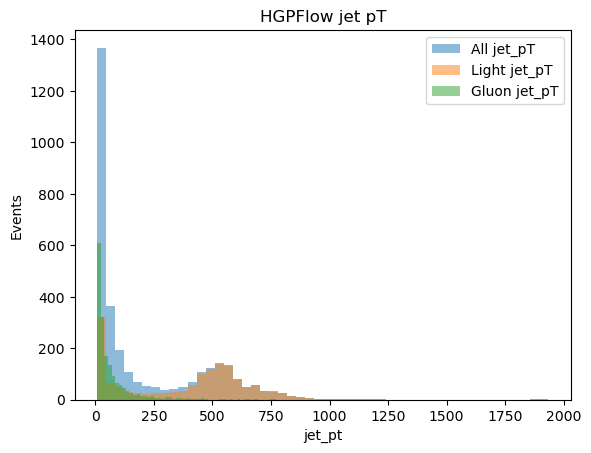

In [26]:
# Sample data structure for illustration purposes - You dont need to run it 
truth_jets_data = perf.truth_hgpflow_jets_matched_dict['truth']
reco_jets_data  = perf.truth_hgpflow_jets_matched_dict['reco']

truth_jet_ids = truth_jets_data["jet_id"]
reco_jet_ids  = reco_jets_data["jet_id"]
reco_jets_data["jet_id"] = truth_jet_ids

# Convert lists to numpy arrays for boolean indexing
jet_ids = np.array(reco_jets_data['jet_id'])
jet_pts = np.array(reco_jets_data['pt'])
print("Original jet number "+str(len(jet_pts)))

# Create a mask for jet_id values 1, 2, or 3
mask = ((jet_ids == 1) | (jet_ids == 2) | (jet_ids == 3) | (jet_ids == 4) | (jet_ids == 5))
maskg = jet_ids == 21
# Filter jet_pt values using the mask
filtered_jet_pts = jet_pts[mask]
filtered_jet_ptsg = jet_pts[maskg]
print("Total number of jets"+str(len(filtered_jet_pts)))
print("Total number of gluon jets"+str(len(filtered_jet_ptsg)))

print(jet_ids)
#Plot all jets 
plt.hist(reco_jets_data["pt"], bins=50, alpha=0.5, label='All jet_pT')
plt.hist(filtered_jet_pts, bins=50, alpha=0.5, label='Light jet_pT')
plt.hist(filtered_jet_ptsg, bins=50, alpha=0.5, label='Gluon jet_pT')

# Adding titles and labels
plt.title('HGPFlow jet pT')
plt.xlabel('jet_pt')
plt.ylabel('Events')
plt.legend()



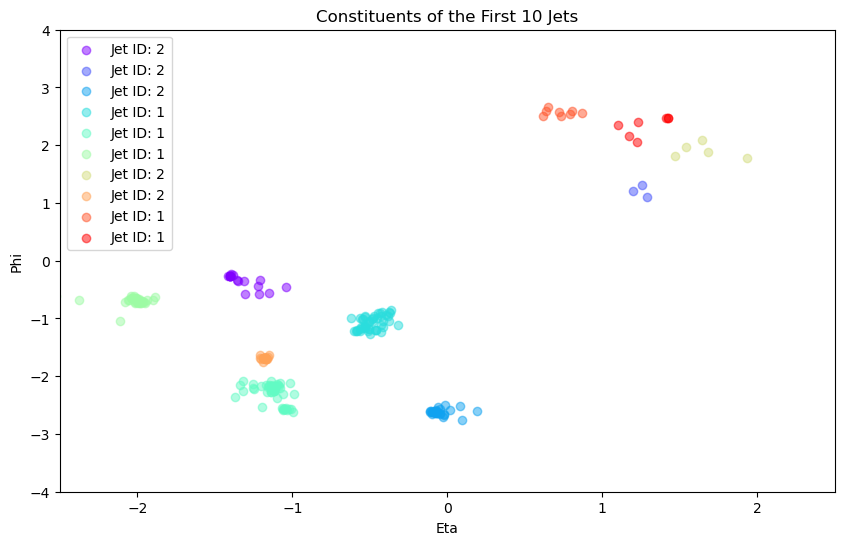

In [13]:
import matplotlib.cm as cm
filtered_jet_indices = np.where(mask)[0]

colors = cm.rainbow(np.linspace(0, 1, 10))

count = 0 
plt.figure(figsize=(10, 6))

for idx in filtered_jet_indices:
    if count>=10:
        break
    jet_id = reco_jets_data['jet_id'][idx]
    const_eta = reco_jets_data['constituents_eta'][idx]
    const_phi = reco_jets_data['constituents_phi'][idx]
    plt.scatter(const_eta, const_phi, alpha=0.5, color=colors[count], label=f'Jet ID: {jet_id}')
    count+=1

plt.xlim(-2.5,2.5)
plt.ylim(-4,4)
plt.xlabel('Eta')
plt.ylabel('Phi')
plt.title('Constituents of the First 10 Jets')
plt.legend()
plt.show()

In [14]:
#Lets save now the X and Y variables of the jets and its constitutents 

def process_file(truth_data_path,pred_data_path,jet_type,fileN):
    perf = Performance(truth_data_path, pred_data_path, hung_matching=hung_matching, jet_clustering=jet_clustering, compute_substructure=compute_substructure, jet_radius=jet_radius, detector=detector, n_events=n_events, enum_offset=enum_offset, ind_threshold=ind_threshold, filepath_reference=filepath_reference,chunk=fileN)

   
    #Now lets manipulate a bit data 
    truth_jets = perf.truth_hgpflow_jets_matched_dict['truth']
    reco_jets   = perf.truth_hgpflow_jets_matched_dict['reco']
    
    truth_jet_ids = truth_jets["jet_id"]
    reco_jets["jet_id"] = truth_jet_ids
    
    # Convert lists to numpy arrays for boolean indexing
    jet_ids = np.array(reco_jets['jet_id'])
    jet_pts = np.array(reco_jets['pt'])

    # Create a mask for jet_id values 1, 2, or 3
    
    if jet_type==1 :
        mask = ((jet_ids == 1) | (jet_ids == 2) | (jet_ids == 3)) & (jet_pts>100)
    else:
        mask = (jet_ids == 21) & (jet_pts>100)

    # Filter jet_pt values using the mask
    filtered_jet_indices = np.where(mask)[0]
    total_jets = len(filtered_jet_indices)
    max_num_particles = max(len(constituents) for constituents in reco_jets['constituents_eta'])
    print("Total Number of constituents is " + str(max_num_particles))
    print("Total Number of jets " + str(total_jets))


    #Initialize X and y which will be saved later 
    X = np.zeros((total_jets, 100, 4))
    
    if jet_type==1:
        y = np.ones(total_jets)  # Initialize Y with ones since all are light quark jets
    else:
        y = np.zeros(total_jets)  # Initialize Y with zeroes if those are gluon jets

    for i,idx in enumerate(filtered_jet_indices):
       
        const_eta = reco_jets['constituents_eta'][idx]
        const_phi = reco_jets['constituents_phi'][idx]
        const_pt  = reco_jets['constituents_pt'][idx]
        const_pid = reco_jets['constituents_class'][idx]

        num_particles = len(const_eta)

         # Fill the values for this jet into the corresponding slice of X
        X[i, :num_particles, 0] = const_pt
        X[i, :num_particles, 1] = const_eta
        X[i, :num_particles, 2] = const_phi
        X[i, :num_particles, 3] = const_pid


    return X, y

In [15]:
def save_to_npz(X, y, output_file):
    print("saving outputs to the npz file")
    np.savez(output_file, X=X, y=y)

In [27]:
for file_n in range(111, 112):
    #Pythia samples
    truth_path = f"/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/Cocoa_Zjets/500GeVPythiaZq/cocoa_Zjets_500GeV_Pythia_job{file_n}_Pseed{file_n}_Cseed{file_n}_1000events_skim.root"
    pred_path = f"/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/HGPFLOW_v2/experiments/hgpflow_v2/cocoapythia500gevxs2xxx9a56ipcxj/inference/500GeVPythiaZq/pred_cocoa_Pythia_Zq_chunk_{file_n}_seg_merged.root"
    filepath_reference = ""
    save_dir_out = f'/srv01/agrp/annai/annai/QURK-GLUON/samples_produce/Cocoa/HGPFLOW_v2/hgpflow_v2/tests/test.npz'
    jet_radius = 0.4
    detector = 'COCOA'
    
    hung_matching = False
    jet_clustering = True
    compute_substructure = False
    ind_threshold = 0.50
    
    n_events = -1
    enum_offset = 0
    jet_type=1 #here jet type 0 for gluon samples and type 1 fror quark samples dont forget to change!!
    X,y = process_file(truth_path,pred_path,jet_type,file_n)
    save_to_npz(X,y,save_dir_out)
    print("done the file number :" + str(file_n))

loading inference data... done
loading truth data... E, pT will be scaled by 0.001


Applying fiducial cuts...: 100%|██████████| 1000/1000 [00:00<00:00, 4958.13it/s]


done
Jet clustering algorithm:  antikt
Jet clustering radius:  0.4


Matching jets...: 100%|██████████| 1000/1000 [00:00<00:00, 32151.59it/s]


Total Number of constituents is 64
Total Number of jets 991
saving outputs to the npz file
done the file number :111


In [ ]:
def load_data(files):
    data = np.load(files)
    X = data['X']
    y = data['y']
    return X, y

In [ ]:
#Now need to take all files and shuffle them 
def shuffle_data(X, y):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
    return X_shuffled, y_shuffled

In [ ]:
def save_shuffled_data(X, y, output_prefix, jets_per_file):
    total_jets = X.shape[0]
    num_files = (total_jets + jets_per_file - 1) // jets_per_file  # Calculate number of files needed
    
    for i in range(num_files):
        start_index = i * jets_per_file
        end_index = min(start_index + jets_per_file, total_jets)
        X_part = X[start_index:end_index]
        y_part = y[start_index:end_index]
        output_file = f"{output_prefix}_{i}.npz"
        np.savez(output_file, X=X_part, y=y_part)
        print(f"Saved {output_file} with {X_part.shape[0]} jets")

In [ ]:
# Example usage
from sklearn.utils import shuffle
for file in range(1,18):
    quark_files = f"inputs_to_NP/herwig/pred_Zqjets_{file}.npz"
    gluon_files = f"inputs_to_NP/herwig/pred_Zglujets_{file}.npz"
    
    # Load data from quark and gluon files
    X_quark, y_quark = load_data(quark_files)
    X_gluon, y_gluon = load_data(gluon_files)
    
    # Concatenate quark and gluon data
    X = np.vstack((X_quark, X_gluon))
    y = np.concatenate((y_quark, y_gluon))

    # Shuffle the data
    X_shuffled, y_shuffled = shuffle_data(X, y)

    # Save the shuffled data into multiple files with a specified number of jets per file
    jets_per_file = 5000
    save_shuffled_data(X_shuffled, y_shuffled, f"herwig_hgpflow_shuffled_output_Zqglu_F{file}", jets_per_file)